In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_82370/1521273946.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [14]:
# Load the dataset
columns = [
    'Family Name', 
    'Variation',
    'Algorithm Name', 
    'Year',
    'Looked at?',
    'Relevant?',
    'Time Complexity Class',
    'Approximation Factor Class (Mult)', 
    'Approximation Factor Class (Add)',
    'Approximation Type (additive/multiplicative)',	
    'Parametrized Approximation?',
    'Type of PTAS (if PTAS)'
]
approximation_algorithms = pd.read_csv('approximation_algorithms.csv', usecols=columns)

# Clean and prepare the data
# drop Looked at? == 0.001
approximation_algorithms = approximation_algorithms[approximation_algorithms['Looked at?'] != '0.001']
# drop Relevant? == 0
approximation_algorithms = approximation_algorithms[approximation_algorithms['Relevant?'] != 0]


approximation_algorithms['Year'] = pd.to_numeric(approximation_algorithms['Year'].str.extract(r'(\d{4})')[0], errors='coerce')
approximation_algorithms.dropna(subset=['Year'], inplace=True)
# approximation_algorithms['Year'] = approximation_algorithms['Year'].astype(int)

# drop empty family names
approximation_algorithms = approximation_algorithms[approximation_algorithms['Family Name'].notnull()]

for col in ['Time Complexity Class', 'Approximation Factor Class (Mult)', 'Approximation Factor Class (Add)']:
    # Extract numeric (float) from string
    approximation_algorithms[col] = approximation_algorithms[col].astype(str).str.extract(r'(\d+\.?\d*)')[0].astype(float)
    approximation_algorithms[col] = approximation_algorithms[col].replace(0, 99999)

approximation_algorithms.sort_values(by=['Family Name', 'Variation', 'Year'], inplace=True)

approximation_algorithms


,Family Name,Looked at?,Relevant?,Variation,Algorithm Name,Year,Time Complexity Class,Approximation Factor Class (Mult),Approximation Factor Class (Add),Approximation Type (additive/multiplicative),Parametrized Approximation?,Type of PTAS (if PTAS)
148,All-Pairs Shortest Paths (APSP),1,1.0,"APSP, unweighted, undirected, no FMM (Approxim...","Aingworth, Chekuri, Indyk, Motwani",1999,5.50,99999.000,2.0,additive,no,NaN
149,All-Pairs Shortest Paths (APSP),1,1.0,"APSP, unweighted, undirected, no FMM (Approxim...","Dor, Halperin, Zwick [APASP_2]",2000,5.33,99999.000,2.0,additive,no,NaN
150,All-Pairs Shortest Paths (APSP),1,1.0,"APSP, unweighted, undirected, no FMM (Approxim...","Dor, Halperin, Zwick [APASP_k]",2000,5.01,99999.000,3.0,additive,yes,NaN
151,All-Pairs Shortest Paths (APSP),1,1.0,"APSP, unweighted, undirected, no FMM (Approxim...","Dor, Halperin, Zwick [APASP_infty]",2000,5.01,4.000,99999.0,multiplicative,no,NaN
152,All-Pairs Shortest Paths (APSP),1,1.0,"APSP, unweighted, undirected, no FMM (Approxim...","Deng, Kirkpatrick, Rong, V. Williams, Zhong",2022,5.29,99999.000,2.0,additive,no,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
858,Transitive Reduction Problem,1,1.0,Minimum Equivalent Digraph,NaN,1996,7.00,2.618,99999.0,multiplicative,no,NaN
861,Transitive Reduction Problem,1,1.0,Minimum Equivalent Digraph,NaN,2009,7.00,2.500,99999.0,multiplicative,no,NaN
847,Wiener Index,1,1.0,Minimum Wiener Connector problem,NaN,2008,5.50,2.000,99999.0,multiplicative,yes,FPTAS
846,Wiener Index,1,1.0,Minimum Wiener Connector problem,Ruchansky,2015,5.01,4.000,99999.0,multiplicative,no,NaN


In [25]:
# read sheet1
# Load the dataset
columns = [
    'Family Name', 
    'Variation',
    'Algorithm Name', 
    'Year',
    'Looked at?',
    'Time Complexity Class',
    'Approximate?',
    'Parallel?',
]
sheet1 = pd.read_csv('sheet1.csv', usecols=columns)

# Clean and prepare the data
# drop Looked at? == 0.001
sheet1 = sheet1[sheet1['Looked at?'] != 0.001]
# drop Parallel? == 1
sheet1 = sheet1[sheet1['Parallel?'] != '1']
# drop approximate? == 1
sheet1 = sheet1[sheet1['Approximate?'] != '1']

# drop if Famiy Name is not in approximation_algorithms
sheet1 = sheet1[sheet1['Family Name'].isin(approximation_algorithms['Family Name'])]

sheet1



,Family Name,Looked at?,Variation,Algorithm Name,Year,Time Complexity Class,Approximate?,Parallel?
2,Optimal Binary Search Trees,2.0,Alphabetic Tree Problem,Klawe; Mumey,1993.0,3,0,0
8,The Subset-Sum Problem,2.0,Subset Sum,Pisinger,2003.0,3,0,0
9,The Subset-Sum Problem,2.0,Subset Sum,Faaland,1973.0,3,0,0
10,The Subset-Sum Problem,2.0,Subset Sum,Pferschy,1999.0,3,0,0
11,The Subset-Sum Problem,2.0,Subset Sum,Klinz,1999.0,4.5,0,0
...,...,...,...,...,...,...,...,...
1022,Interval Scheduling,1.0,"Unweighted Interval Scheduling, Online",Priority scheduling,1940.0,3,0,0
1023,Interval Scheduling,1.0,"Unweighted Interval Scheduling, Online",Shortest remaining time first,1940.0,3,0,0
1024,Interval Scheduling,1.0,"Unweighted Interval Scheduling, Online","First come, first served",1940.0,3,0,0
1025,Interval Scheduling,1.0,"Unweighted Interval Scheduling, Online",Round-robin scheduling,1940.0,3,0,0


In [32]:
# concatenate the two dataframes
df = pd.concat([approximation_algorithms, sheet1], axis=0)
# filter by family = Maximum Flow
df = df[df['Family Name'] == 'Maximum Flow']

# sort by year
df.sort_values(by='Year', inplace=True)

# create column exact that is True if the algorithm have no Approximation Type
df['Exact'] = df['Approximation Type (additive/multiplicative)'].isnull()

# create a column Constant Factor that is True if the algorithm have Approximation Factor Class (Mult) <= 2 or Approximation Factor Class (Add) <= 4.5 or is exact
df['Constant Factor'] = (df['Approximation Factor Class (Mult)'] <= 2) | (df['Approximation Factor Class (Add)'] <= 4.5) | df['Exact']

df


,Family Name,Looked at?,Relevant?,Variation,Algorithm Name,Year,Time Complexity Class,Approximation Factor Class (Mult),Approximation Factor Class (Add),Approximation Type (additive/multiplicative),Parametrized Approximation?,Type of PTAS (if PTAS),Approximate?,Parallel?,Exact,Constant Factor
187,Maximum Flow,1.0,NaN,NaN,Dantzig,1951.0,7,NaN,NaN,NaN,NaN,NaN,0,0,True,True
39,Maximum Flow,2.0,NaN,NaN,Ford & Fulkerson,1955.0,7,NaN,NaN,NaN,NaN,NaN,0,0,True,True
40,Maximum Flow,2.0,NaN,NaN,Dinitz,1970.0,7,NaN,NaN,NaN,NaN,NaN,0,0,True,True
41,Maximum Flow,2.0,NaN,NaN,Edmonds & Karp,1972.0,7,NaN,NaN,NaN,NaN,NaN,0,0,True,True
188,Maximum Flow,2.0,NaN,NaN,Dinitz (with dynamic trees),1973.0,6,NaN,NaN,NaN,NaN,NaN,0,0,True,True
42,Maximum Flow,2.0,NaN,NaN,Karzanov,1974.0,6,NaN,NaN,NaN,NaN,NaN,0,0,True,True
189,Maximum Flow,2.0,NaN,NaN,Cherkassky,1977.0,6,NaN,NaN,NaN,NaN,NaN,0,0,True,True
43,Maximum Flow,2.0,NaN,NaN,Galil & Naamad,1980.0,6.02,NaN,NaN,NaN,NaN,NaN,0,0,True,True
190,Maximum Flow,1.0,NaN,NaN,Sleator & Tarjan,1983.0,6.01,NaN,NaN,NaN,NaN,NaN,0,0,True,True
191,Maximum Flow,1.0,NaN,NaN,Goldberg & Tarjan,1986.0,6,NaN,NaN,NaN,NaN,NaN,0,0,True,True


TypeError: 'value' must be an instance of str or bytes, not a float

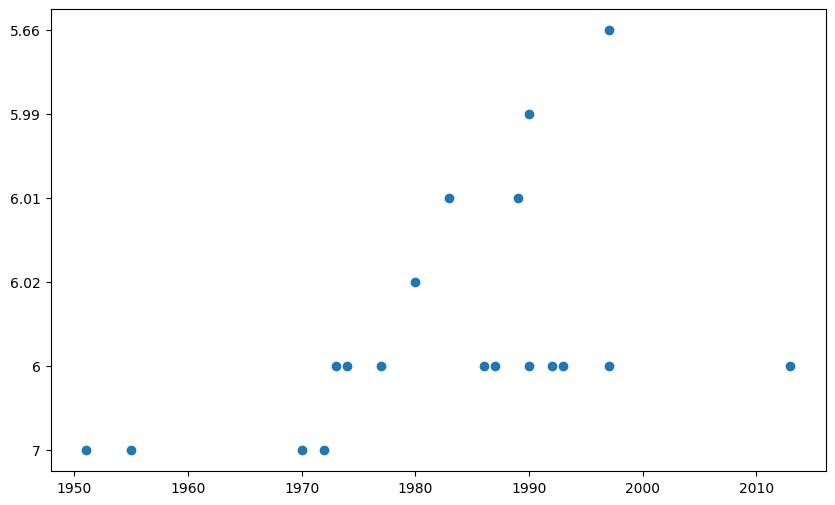

In [40]:
exact = df[df['Exact']]
constant_factor = df[df['Constant Factor']]
approximate = df[~df['Exact'] & ~df['Constant Factor']]

# 1: constant
# 2: polylogarithmic
# 3: linear
# 4: quasilinear (n log^c n)
# 5: quadratic
# 6: cubic
# 7: polynomial (>3)
# 8: superpolynomial

# plot Time Complexity Class vs Year
plt.figure(figsize=(10, 6))
plt.plot(exact['Year'], exact['Time Complexity Class'], 'o', label='Exact')
plt.plot(constant_factor['Year'], constant_factor['Time Complexity Class'], 'o', label='Constant Factor')
plt.plot(approximate['Year'], approximate['Time Complexity Class'], 'o', label='Approximate')
plt.xlabel('Year')
plt.ylabel('Time Complexity Class')

# invert y axis
plt.gca().invert_yaxis()

# name ticks
ticks = np.arange(1, 9)
plt.yticks(ticks, ['constant', 'polylogarithmic', 'linear', 'quasilinear', 'quadratic', 'cubic', 'polynomial', 'superpolynomial'])


plt.legend()
plt.title('Time Complexity Class vs Year')
plt.show()
